**Data Preprocessing**

In [1]:
#Importing relevant libraries

import pandas as pd

In [2]:
df = pd.read_csv('codeforces_data.csv')

In [4]:
#Dropping rows with null values if any

df = df.dropna()

In [14]:
df['Total problems']=df['Total problems'].str.replace('problems','')
df['Problems last month']=df['Problems last month'].str.replace('problems','')
df['Rating']=df['Rating'].replace('\n','')

In [15]:
df

,CF_Handle,Rating,Total problems,Problems last month,Contest given,First contest date
0,tourist,3947,2599,24,268,\n\n Feb/25/2010 22:30U...
1,jiangly,3734,6122,82,162,\n\n Jan/20/2019 17:35U...
2,Benq,3620,3740,24,151,\n\n Jul/14/2015 20:40U...
3,ksun48,3479,3316,37,276,\n\n Jan/08/2012 21:30U...
4,ecnerwala,3581,2989,17,186,\n\n Jul/11/2012 22:00U...
...,...,...,...,...,...,...
468,not_makise,1393,469,36,91,\n\n Dec/27/2022 20:05U...
469,nishaddhuri,1272,122,2,46,\n\n Jan/31/2022 20:05U...
470,0Arctic0,1331,104,5,12,\n\n Jul/30/2021 20:05U...
471,SadSock,1331,12,0,6,\n\n Dec/27/2022 20:05U...


In [18]:
df['First contest year'] = df['First contest date'].str.extract(r'/(\d{4})')

In [27]:
df.drop(columns = ['First contest date'], inplace=True)

In [29]:
df['Rating'] = df['Rating'].astype(int)
df['First contest year'] = df['First contest year'].astype(int)
df['Contest given'] = df['Contest given'].astype(int)

In [ ]:
df['Total problems'] = df['Total problems'].str.extract('(\d+)')
df['Total problems'] = df['Total problems'].astype(int)

In [35]:
df['Problems last month'] = df['Problems last month'].str.extract('(\d+)')
df['Problems last month'] = df['Problems last month'].astype(int)

In [37]:
df.dtypes

CF_Handle              object
Rating                  int32
Total problems          int32
Problems last month     int32
Contest given           int32
First contest year      int32
dtype: object

In [38]:
from sklearn.preprocessing import StandardScaler

In [40]:
#Normalising the training features

scaler=StandardScaler()

In [43]:
numerical_features=['Rating','Total problems','Problems last month', 'Contest given', 'First contest year']
df[numerical_features]=scaler.fit_transform(df[numerical_features])

In [45]:
X=df[numerical_features]

**Training the data using K-Means Clustering**

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

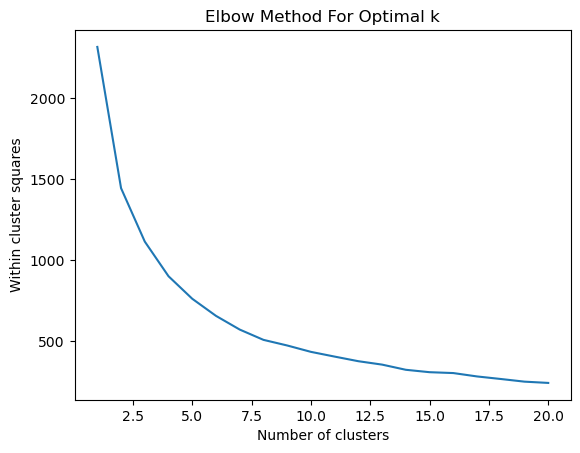

In [51]:
#Using elbow method to find the optimal number of clusters

within_cluster_squares = [] 
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    within_cluster_squares.append(kmeans.inertia_)

plt.plot(range(1, 21), within_cluster_squares)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster squares')
plt.show()

In [72]:
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)

df['cluster'] = kmeans.fit_predict(X)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [73]:
df

,CF_Handle,Rating,Total problems,Problems last month,Contest given,First contest year,cluster
0,tourist,3.830180,2.426723,0.413205,4.278798,-4.683963,2
1,jiangly,3.508133,6.433029,2.901705,2.302208,-1.161481,4
2,Benq,3.335770,3.724252,0.413205,2.097091,-2.727029,2
3,ksun48,3.122584,3.242085,0.970973,4.427974,-3.901189,2
4,ecnerwala,3.276803,2.870225,0.112869,2.749738,-3.901189,2
...,...,...,...,...,...,...,...
468,not_makise,-0.031363,0.004517,0.928067,0.978266,0.012680,3
469,nishaddhuri,-0.214310,-0.390087,-0.530708,0.139148,0.012680,1
470,0Arctic0,-0.125104,-0.410556,-0.401993,-0.494852,-0.378707,1
471,SadSock,-0.125104,-0.515177,-0.616518,-0.606735,0.012680,1


In [74]:
file_name = 'clusters_.xlsx'
sheet_name = 'clusters1_'

# Saving the DataFrame to Excel
df.to_excel(file_name, sheet_name=sheet_name, index=False)


In [75]:
import os

In [76]:
if os.name == 'nt':  
    os.startfile(file_name)

In [77]:
scaled_centroids = kmeans.cluster_centers_
unscaled_centroids = scaler.inverse_transform(scaled_centroids).astype('int')

In [78]:
print(scaled_centroids)

[[ 1.20096794e+00  1.27014161e+00  1.18828354e-01  1.58274222e+00
  -1.08537789e+00]
 [-1.03892521e-01 -3.55938012e-01 -1.95797931e-01 -3.83241296e-01
   4.36365787e-01]
 [ 2.15996984e+00  2.68874950e+00  1.70076186e-01  3.59351793e+00
  -3.90118950e+00]
 [ 4.88041620e-01 -5.01001918e-03 -2.44819650e-01  2.04412967e-01
  -6.74244098e-01]
 [ 2.41271897e+00  7.12756536e+00  3.28785130e+00  2.49334080e+00
  -1.65071458e+00]
 [ 3.65697373e-01  1.93619834e-01  2.66503443e+00  5.79432397e-02
   2.90438398e-01]
 [-1.53379208e+00 -5.09057312e-01 -4.96835632e-01 -6.96780296e-01
   7.85154150e-01]]


In [79]:
print(unscaled_centroids)

[[2208 1581   17  123 2019]
 [1345  152    9   17 2023]
 [2842 2829   18  231 2012]
 [1736  460    8   49 2020]
 [3009 6732   91  172 2017]
 [1655  635   76   41 2022]
 [ 399   17    2    1 2023]]


In [80]:
#Finding the centroid of the clusters

centroids_df=pd.DataFrame(unscaled_centroids, columns=numerical_features)

In [81]:
centroids_df

,Rating,Total problems,Problems last month,Contest given,First contest year
0,2208,1581,17,123,2019
1,1345,152,9,17,2023
2,2842,2829,18,231,2012
3,1736,460,8,49,2020
4,3009,6732,91,172,2017
5,1655,635,76,41,2022
6,399,17,2,1,2023


In [88]:
import numpy as np
centroids_df['Cluster']=np.arange(len(unscaled_centroids))

In [93]:
#User persona 

centroids_df

,Rating,Total problems,Problems last month,Contest given,First contest year,Cluster
0,2208,1581,17,123,2019,0
1,1345,152,9,17,2023,1
2,2842,2829,18,231,2012,2
3,1736,460,8,49,2020,3
4,3009,6732,91,172,2017,4
5,1655,635,76,41,2022,5
6,399,17,2,1,2023,6
